In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
import scipy.stats as st
import re

# File to Load (Remember to Change These)
employment = "Ray Data/employment_study.csv"
covid = "Ray Data/australian_daily_cases_quarterly.csv"

# Read source data and store into Pandas data frame
employment_data = pd.read_csv(employment, sep=r',')
covid_data = pd.read_csv(covid)


In [2]:
employment_data.head(10)

,Date,Total Employed,Employed Fulltime,Employed Parttime,Total Unemployed,Unemployed Looked Fulltime,Unemployed looked Parttime,Labour Force Total,Month,Year,Quarter
0,2018-01-01,12305064.62,8444717.71,3860346.92,780055.83,548490.74,231565.10,13085120.46,1,2018,1
1,2018-02-01,12528184.69,8623894.89,3904289.80,805671.79,560304.52,245367.27,13333856.49,2,2018,1
2,2018-03-01,12494836.08,8485068.22,4009767.86,777802.03,546025.96,231776.07,13272638.11,3,2018,1
3,2018-04-01,12525911.99,8515181.90,4010730.09,740584.13,503975.04,236609.09,13266496.12,4,2018,2
4,2018-05-01,12572697.36,8516201.73,4056495.63,702170.97,485850.29,216320.68,13274868.33,5,2018,2
5,2018-06-01,12608359.05,8547953.57,4060405.48,687891.22,492132.05,195759.17,13296250.26,6,2018,2
6,2018-07-01,12575383.41,8614225.78,3961157.64,689922.43,494527.94,195394.49,13265305.85,7,2018,3
7,2018-08-01,12547537.70,8561225.58,3986312.12,698353.14,486234.00,212119.13,13245890.84,8,2018,3
8,2018-09-01,12615471.65,8614595.76,4000875.89,648354.24,433591.63,214762.62,13263825.90,9,2018,3
9,2018-10-01,12654573.20,8662486.91,3992086.28,634151.75,419847.62,214304.13,13288724.95,10,2018,4


In [3]:
employment_data

,Date,Total Employed,Employed Fulltime,Employed Parttime,Total Unemployed,Unemployed Looked Fulltime,Unemployed looked Parttime,Labour Force Total,Month,Year,Quarter
0,2018-01-01,12305064.62,8444717.71,3860346.92,780055.83,548490.74,231565.10,13085120.46,1,2018,1
1,2018-02-01,12528184.69,8623894.89,3904289.80,805671.79,560304.52,245367.27,13333856.49,2,2018,1
2,2018-03-01,12494836.08,8485068.22,4009767.86,777802.03,546025.96,231776.07,13272638.11,3,2018,1
3,2018-04-01,12525911.99,8515181.90,4010730.09,740584.13,503975.04,236609.09,13266496.12,4,2018,2
4,2018-05-01,12572697.36,8516201.73,4056495.63,702170.97,485850.29,216320.68,13274868.33,5,2018,2
5,2018-06-01,12608359.05,8547953.57,4060405.48,687891.22,492132.05,195759.17,13296250.26,6,2018,2
6,2018-07-01,12575383.41,8614225.78,3961157.64,689922.43,494527.94,195394.49,13265305.85,7,2018,3
7,2018-08-01,12547537.70,8561225.58,3986312.12,698353.14,486234.00,212119.13,13245890.84,8,2018,3
8,2018-09-01,12615471.65,8614595.76,4000875.89,648354.24,433591.63,214762.62,13263825.90,9,2018,3
9,2018-10-01,12654573.20,8662486.91,3992086.28,634151.75,419847.62,214304.13,13288724.95,10,2018,4


In [4]:
# Collect unique data
covid_data['State'].unique()

array(['Australian Capital Territory', 'Queensland', 'New South Wales',
       'South Australia', 'Tasmania', 'Victoria', 'Western Australia'],
      dtype=object)

In [5]:
# Filter data for refence
covid_data = covid_data.iloc[:,2:]
covid_data

,Date,Covid_Cases_Cumulative,Covid_Cases,Month,Year,Quarter
0,2018-01-01,0,0.0,1,2018,1
1,2018-01-02,0,0.0,1,2018,1
2,2018-01-03,0,0.0,1,2018,1
3,2018-01-04,0,0.0,1,2018,1
4,2018-01-05,0,0.0,1,2018,1
...,...,...,...,...,...,...
9643,2021-04-16,967,6.0,4,2021,2
9644,2021-04-17,973,2.0,4,2021,2
9645,2021-04-18,975,3.0,4,2021,2
9646,2021-04-19,978,2.0,4,2021,2


In [6]:
# Filter dataframe
covid_data_sorted = covid_data.groupby(["Year", "Month","Quarter"]).sum()
covid_data_sorted

Covid_Cases_Cumulative  Covid_Cases
Year Month Quarter                                     
2018 1     1                             0          0.0
     2     1                             0          0.0
     3     1                             0          0.0
     4     2                             0          0.0
     5     2                             0          0.0
     6     2                             0          0.0
     7     3                             0          0.0
     8     3                             0          0.0
     9     3                             0          0.0
     10    4                             0          0.0
     11    4                             0          0.0
     12    4                             0          0.0
2019 1     1                             0          0.0
     2     1                             0          0.0
     3     1                             0          0.0
     4     2                             0          0.0
     5     2                             0          0.0
     6     2                             0          0.0
     7     3                             0          0.0
     8     3                             0          0.0
     9     3                             0          0.0
     10    4                             0          0.0
     11    4                             0          0.0
     12    4                             0          0.0
2020 1     1                            61         16.0
     2     1                           547         17.0
     3     1                         51310       6992.0
     4     2                        271952       2756.0
     5     2                        311858        515.0
     6     2                        315896        886.0
     7     3                        470642      10464.0
     8     3                        832087       8323.0
     9     3                        925085       1338.0
     10    4                        981440        688.0
     11    4                        966251        463.0
     12    4                       1016375        874.0
2021 1     1                       1042618        505.0
     2     1                        950255        227.0
     3     1                       1062973        456.0
     4     2                        693120        340.0

In [7]:
# Set new dataframe
covid_employment = pd.merge(employment_data, covid_data_sorted, on=['Month','Year','Quarter'])
covid_employment.head()

,Date,Total Employed,Employed Fulltime,Employed Parttime,Total Unemployed,Unemployed Looked Fulltime,Unemployed looked Parttime,Labour Force Total,Month,Year,Quarter,Covid_Cases_Cumulative,Covid_Cases
0,2018-01-01,12305064.62,8444717.71,3860346.92,780055.83,548490.74,231565.10,13085120.46,1,2018,1,0,0.0
1,2018-02-01,12528184.69,8623894.89,3904289.80,805671.79,560304.52,245367.27,13333856.49,2,2018,1,0,0.0
2,2018-03-01,12494836.08,8485068.22,4009767.86,777802.03,546025.96,231776.07,13272638.11,3,2018,1,0,0.0
3,2018-04-01,12525911.99,8515181.90,4010730.09,740584.13,503975.04,236609.09,13266496.12,4,2018,2,0,0.0
4,2018-05-01,12572697.36,8516201.73,4056495.63,702170.97,485850.29,216320.68,13274868.33,5,2018,2,0,0.0


In [8]:
#Filter data
plotone_a = covid_employment.iloc[:,[1,4,8,9,10,12]]
plotone_a.head()

,Total Employed,Total Unemployed,Month,Year,Quarter,Covid_Cases
0,12305064.62,780055.83,1,2018,1,0.0
1,12528184.69,805671.79,2,2018,1,0.0
2,12494836.08,777802.03,3,2018,1,0.0
3,12525911.99,740584.13,4,2018,2,0.0
4,12572697.36,702170.97,5,2018,2,0.0


In [9]:
# Collect data for Legend column
years = []
quarters = []

for y in plotone_a['Quarter']:
    quarter = 'Q'+str(y)
    quarters.append(quarter)

for x in plotone_a['Year']:
    plotone_a['Month']
    year = str(x)
    years.append(year)
legend = list(zip(quarters,years))

type(legend)

list

In [10]:
plotone_a["Legend"] = legend
plotone_a

,Total Employed,Total Unemployed,Month,Year,Quarter,Covid_Cases,Legend
0,12305064.62,780055.83,1,2018,1,0.0,"(Q1, 2018)"
1,12528184.69,805671.79,2,2018,1,0.0,"(Q1, 2018)"
2,12494836.08,777802.03,3,2018,1,0.0,"(Q1, 2018)"
3,12525911.99,740584.13,4,2018,2,0.0,"(Q2, 2018)"
4,12572697.36,702170.97,5,2018,2,0.0,"(Q2, 2018)"
5,12608359.05,687891.22,6,2018,2,0.0,"(Q2, 2018)"
6,12575383.41,689922.43,7,2018,3,0.0,"(Q3, 2018)"
7,12547537.70,698353.14,8,2018,3,0.0,"(Q3, 2018)"
8,12615471.65,648354.24,9,2018,3,0.0,"(Q3, 2018)"
9,12654573.20,634151.75,10,2018,4,0.0,"(Q4, 2018)"


In [11]:
plotone_a.head()

,Total Employed,Total Unemployed,Month,Year,Quarter,Covid_Cases,Legend
0,12305064.62,780055.83,1,2018,1,0.0,"(Q1, 2018)"
1,12528184.69,805671.79,2,2018,1,0.0,"(Q1, 2018)"
2,12494836.08,777802.03,3,2018,1,0.0,"(Q1, 2018)"
3,12525911.99,740584.13,4,2018,2,0.0,"(Q2, 2018)"
4,12572697.36,702170.97,5,2018,2,0.0,"(Q2, 2018)"


In [12]:
# Select needed columns
plot_data = plotone_a.iloc[:,[0,1,2,5,6]]
plot_data.to_csv("Ray Data/clean.csv")
plot_data

,Total Employed,Total Unemployed,Month,Covid_Cases,Legend
0,12305064.62,780055.83,1,0.0,"(Q1, 2018)"
1,12528184.69,805671.79,2,0.0,"(Q1, 2018)"
2,12494836.08,777802.03,3,0.0,"(Q1, 2018)"
3,12525911.99,740584.13,4,0.0,"(Q2, 2018)"
4,12572697.36,702170.97,5,0.0,"(Q2, 2018)"
5,12608359.05,687891.22,6,0.0,"(Q2, 2018)"
6,12575383.41,689922.43,7,0.0,"(Q3, 2018)"
7,12547537.70,698353.14,8,0.0,"(Q3, 2018)"
8,12615471.65,648354.24,9,0.0,"(Q3, 2018)"
9,12654573.20,634151.75,10,0.0,"(Q4, 2018)"


In [13]:
# Grouped then sum
grouped = plot_data.groupby(["Legend"]).sum()
grouped.to_csv("Ray Data/clean.csv")
grouped

,Total Employed,Total Unemployed,Month,Covid_Cases
Legend,,,,
"(Q1, 2018)",37328085.39,2363529.65,6,0.0
"(Q1, 2019)",38190482.48,2186478.65,6,0.0
"(Q1, 2020)",38889199.11,2301815.03,6,7025.0
"(Q1, 2021)",38886098.29,2645261.09,6,1188.0
"(Q2, 2018)",37706968.40,2130646.32,15,0.0
"(Q2, 2019)",38642412.01,2100233.44,15,0.0
"(Q2, 2020)",36994383.38,2721696.05,15,4157.0
"(Q3, 2018)",37738392.76,2036629.81,24,0.0
"(Q3, 2019)",38671459.57,2108791.74,24,0.0


In [14]:
# File to Load
data = "Ray Data/clean.csv"

# Read source data and store into Pandas data frame
plot_now = pd.read_csv(data)
plot_now

,Legend,Total Employed,Total Unemployed,Month,Covid_Cases
0,"('Q1', '2018')",37328085.39,2363529.65,6,0.0
1,"('Q1', '2019')",38190482.48,2186478.65,6,0.0
2,"('Q1', '2020')",38889199.11,2301815.03,6,7025.0
3,"('Q1', '2021')",38886098.29,2645261.09,6,1188.0
4,"('Q2', '2018')",37706968.40,2130646.32,15,0.0
5,"('Q2', '2019')",38642412.01,2100233.44,15,0.0
6,"('Q2', '2020')",36994383.38,2721696.05,15,4157.0
7,"('Q3', '2018')",37738392.76,2036629.81,24,0.0
8,"('Q3', '2019')",38671459.57,2108791.74,24,0.0
9,"('Q3', '2020')",37612491.36,2825999.08,24,20125.0


In [15]:
# Variable declaration
legend = plot_now['Legend']
employed = plot_now['Total Employed']
unemployed = plot_now['Total Unemployed']
covid = plot_now['Covid_Cases']

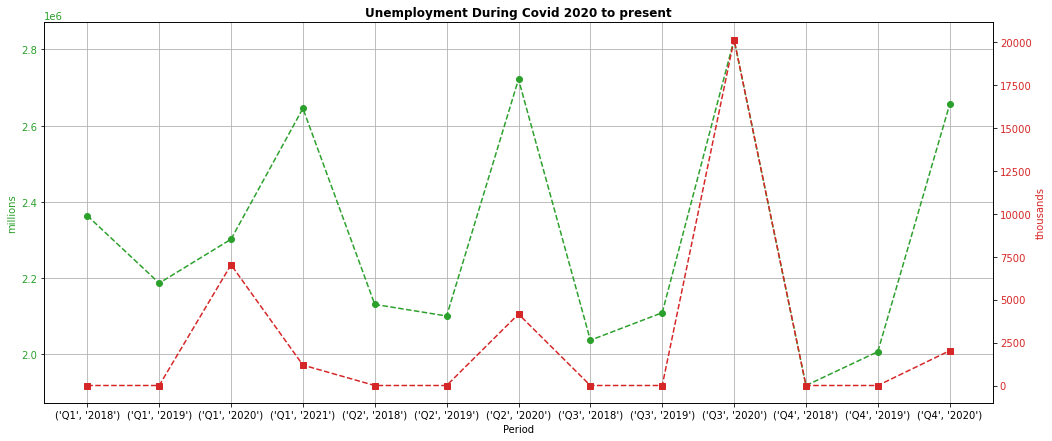

In [16]:
# Plot properties
fig, ax1 = plt.subplots() 
fig.set_size_inches(17, 7)
color = 'tab:green'
ax1.set_xlabel('Period') 
ax1.set_ylabel('millions', color = color) 
ax1.plot(legend,unemployed, color = color, LineStyle="--", Marker= "o") 
ax1.tick_params(axis ='y', labelcolor = color) 
ax1.grid()
  
# Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx() 
  
color = 'tab:red'
ax2.set_ylabel('thousands', color = color) 
ax2.plot( covid, color = color, LineStyle="--", Marker= "s") 
ax2.tick_params(axis ='y', labelcolor = color) 
  
# Adding title
plt.title('Unemployment During Covid 2020 to present', fontweight ="bold") 



    
# Show plot
plt.show()

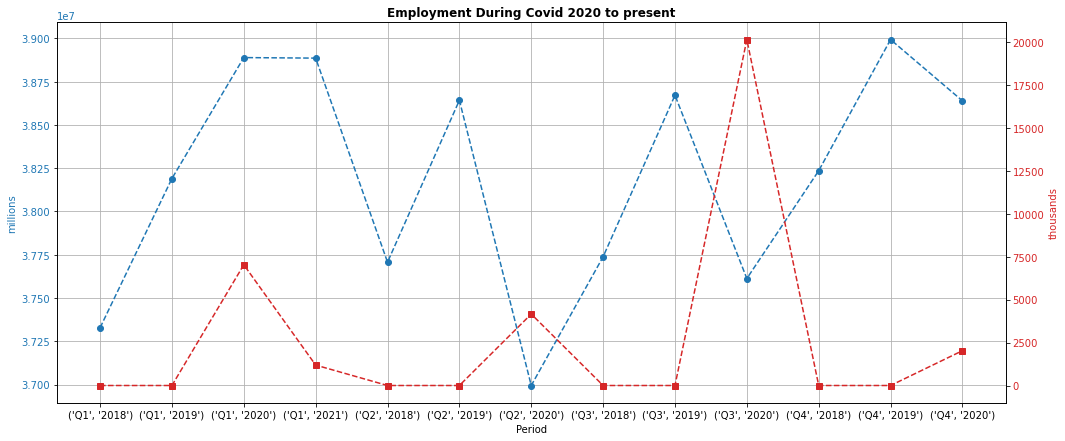

In [17]:
# Plot properties
fig, ax1 = plt.subplots() 
fig.set_size_inches(17, 7)
color = 'tab:blue'
ax1.set_xlabel('Period') 
ax1.set_ylabel('millions', color = color) 
ax1.plot(legend,employed, color = color,LineStyle="--", Marker= "o") 
ax1.tick_params(axis ='y', labelcolor = color) 
ax1.grid()
  
# Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx() 
  
color = 'tab:red'
ax2.set_ylabel('thousands', color = color) 
ax2.plot( covid, color = color,LineStyle="--", Marker= "s") 
ax2.tick_params(axis ='y', labelcolor = color) 
  
# Adding title
plt.title('Employment During Covid 2020 to present', fontweight ="bold") 
  
# Show plot
plt.show()

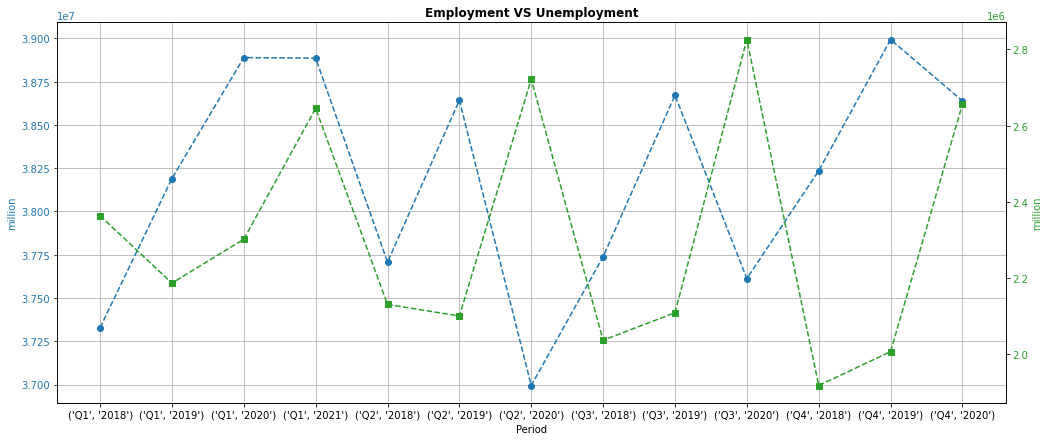

In [18]:
# Plot properties
fig, ax1 = plt.subplots() 
fig.set_size_inches(17, 7)
color = 'tab:blue'
ax1.set_xlabel('Period') 
ax1.set_ylabel('million', color = color) 
ax1.plot(legend,employed, color = color, LineStyle="--", Marker= "o") 
ax1.tick_params(axis ='y', labelcolor = color) 
ax1.grid()
  
# Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx() 
  
color = 'tab:green'
ax2.set_ylabel('million', color = color) 
ax2.plot(unemployed, color = color, LineStyle="--", Marker= "s") 
ax2.tick_params(axis ='y', labelcolor = color) 
  
# Adding title
plt.title('Employment VS Unemployment', fontweight ="bold") 
  
# Show plot
plt.show()

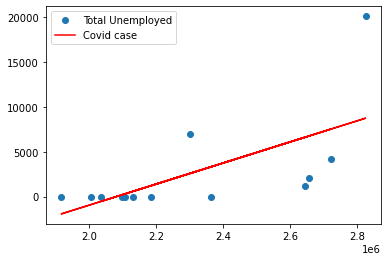

In [19]:
# Plot reference variable
y = plot_now['Covid_Cases']
x = plot_now['Total Unemployed']

# Linear regression properties
res = st.linregress(x, y)
plt.plot(x, y, 'o', label='Total Unemployed')
plt.plot(x, res.intercept + res.slope*x, 'r', label='Covid case')
plt.legend()
plt.show()